In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.linear_model

In [27]:
dfWhite = pd.read_csv('../white.csv')
dfMiscWhite = pd.read_csv('../misc_white.csv')
dfEmpty = pd.read_csv('../empty.csv')
dfBlack = pd.read_csv('../black.csv')
dfMiscBlack = pd.read_csv('../misc_black.csv')
dfRed = pd.read_csv('../red120ms.csv')
dfGreen = pd.read_csv('../green120ms.csv')
#dfConveyor = pd.read_csv('data4.csv')
dfWhite.head(100)

,Red,Green,Blue,Clear,ColorTemp,Lux
0,62991,65535,56653,65535,5983,41522
1,64645,65535,57742,65535,6097,40188
2,62405,65535,55545,65535,5786,42524
3,62413,65535,55556,65535,5787,42513
4,62410,65535,55551,65535,5786,42518
...,...,...,...,...,...,...
86,58251,65535,53411,65535,5684,45434
87,53133,65535,46953,65535,4999,51822
88,65535,65535,59879,65535,6595,38335
89,65535,65535,59863,65535,6590,38347


In [3]:
dfWhite.columns

Index(['Red', 'Green', 'Blue', 'Clear', 'ColorTemp', 'Lux'], dtype='object')

In [4]:
dfWhitePoints = dfWhite[['Red','Green','Blue']].values
dfEmptyPoints = dfEmpty[['Red','Green','Blue']].values
dfBlackPoints = dfBlack[['Red','Green','Blue']].values
dfWhiteTriangles = Delaunay(dfWhitePoints[:, :2])

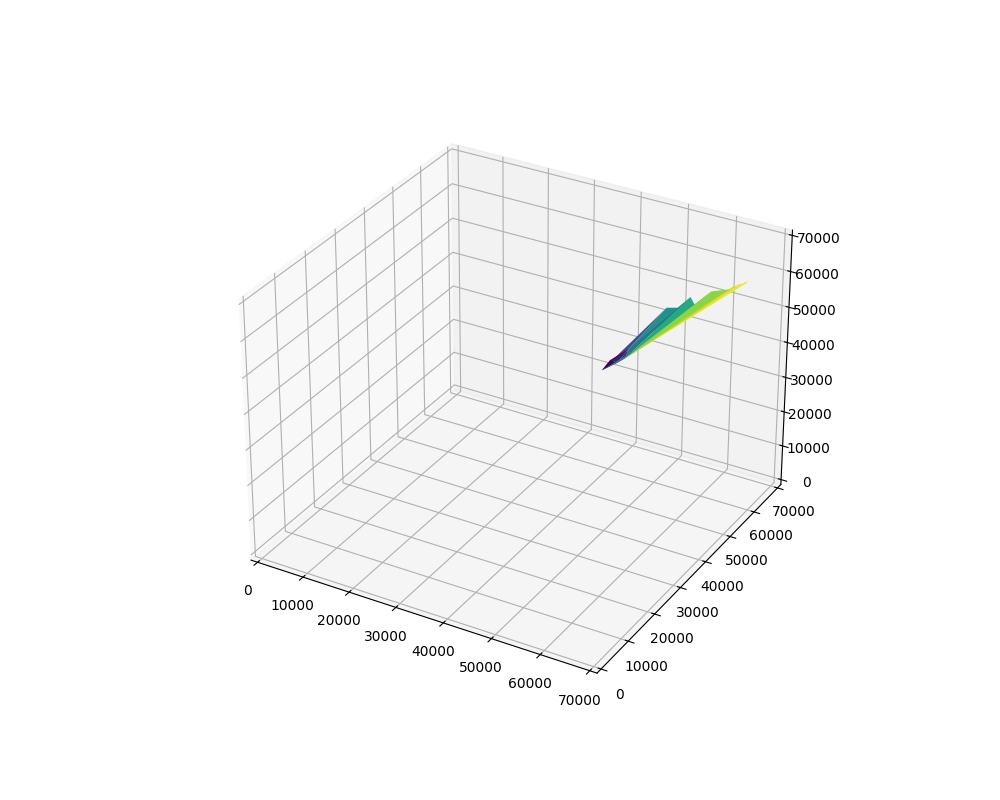

In [5]:
%matplotlib widget
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
# Plot the surface
ax.plot_trisurf(dfWhitePoints[:, 0], dfWhitePoints[:, 1], dfWhitePoints[:, 2], triangles=dfWhiteTriangles.simplices, cmap='viridis', edgecolor='none')

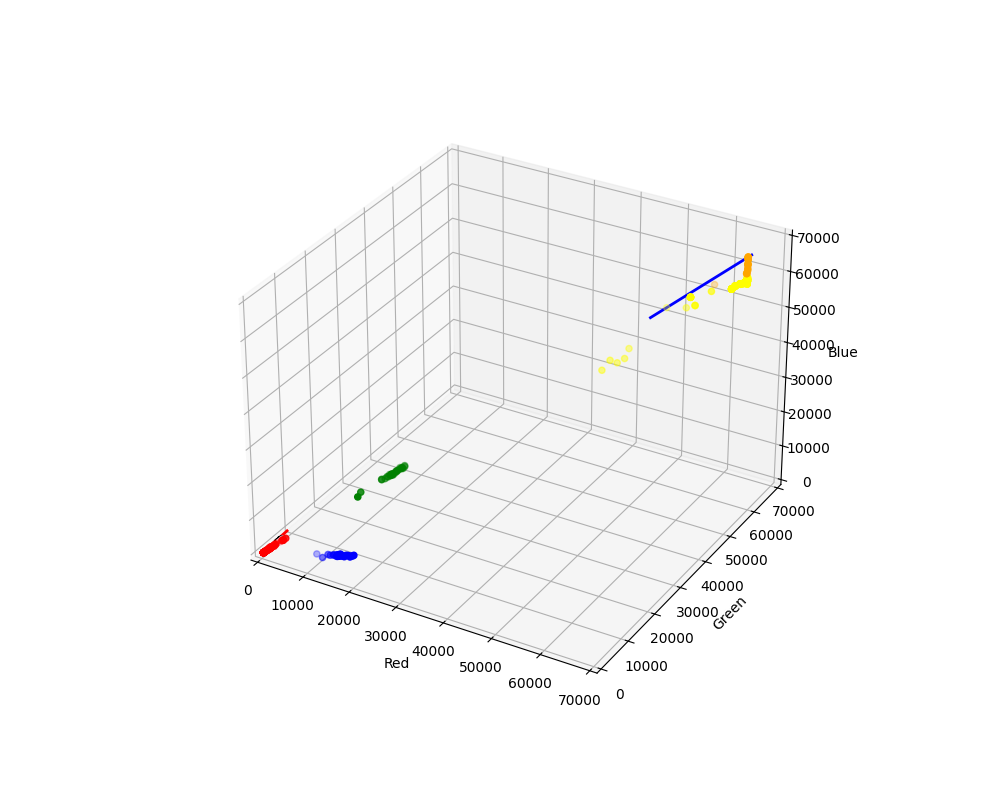

In [34]:
%matplotlib widget
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
# ax.set_xlim(1000, 4000)
# ax.set_ylim(1000, 4000)
# ax.set_zlim(1000, 4000)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

fg1 = ax.scatter3D(dfWhite['Red'], dfWhite['Green'], dfWhite['Blue'], color='yellow')
fg1 = ax.scatter3D(dfMiscWhite['Red'], dfMiscWhite['Green'], dfMiscWhite['Blue'], color='orange')

fg2 = ax.scatter3D(dfEmpty['Red'], dfEmpty['Green'], dfEmpty['Blue'], color='red')

fg3 = ax.scatter3D(dfBlack['Red'], dfBlack['Green'], dfBlack['Blue'], color='black')

fg3 = ax.scatter3D(dfGreen['Red'], dfGreen['Green'], dfGreen['Blue'], color='green')

fg3 = ax.scatter3D(dfRed['Red'], dfRed['Green'], dfRed['Blue'], color='blue')
fg3 = ax.scatter3D(dfMiscBlack['Red'], dfMiscBlack['Green'], dfMiscBlack['Blue'], color='pink')

plt.plot([1500, 2500], [2444, 4000], [1611, 3000], color='black', lw=2);
plt.plot([0, 3100], [0, 4000], [0, 5000], color='red', lw=2);
plt.plot([46000, 66000], [64800, 66000], [42000, 66000], color='blue', lw=2);

# plt.plot(2300, 3000, 3000, 'bo');
# plt.plot([45000, 65536], [0, 3500], [0, 3500], color='red', lw=2);
#dfEmpty
#fg4 = ax.scatter3D(dfConveyor['r'], dfConveyor['g'], dfConveyor['b'])

In [7]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Define the line points
A = np.array([1900, 3000, 2200])
B = np.array([2400, 3700, 2700])


# Calculate distances
distances = [point_to_line_distance(P, A, B) for P in dfBlackPoints]

# Create DataFrame
df_distances_black = pd.DataFrame(dfBlackPoints, columns=['red', 'green', 'blue'])
df_distances_black['distance_to_line'] = distances

print(df_distances_black)

     red  green  blue  distance_to_line
0   2046   3278  2384         42.867897
1   2018   3262  2348         57.895064
2   2051   3293  2351         57.990595
3   2055   3309  2356         64.887938
4   2081   3359  2432         61.385518
5   2033   3346  2402         93.055973
6   1983   3338  2422        132.245639
7   1965   3305  2389        125.935048
8   1946   3264  2358        117.008158
9   1930   3224  2295        107.343967
10  1932   3277  2353        135.308925
11  2005   3344  2417        115.654746
12  2034   3357  2401         99.113138
13  2046   3342  2416         80.091362
14  2043   3346  2390         86.845154
15  2055   3379  2432         94.161156
16  2084   3413  2468         90.779453
17  2105   3360  2390         60.281327
18  2096   3401  2465         74.006142
19  2125   3451  2486         79.100626
20  2133   3476  2501         87.104373
21  1813   2881  2156         36.068117
22  1922   3171  2271         82.852552
23  2078   3332  2407         48.921913


In [8]:
df_distances_black['distance_to_line'].max()

156.6270098099948

In [9]:
  def angle_between_vector_and_point_AP(P, A, B):
    AP = P - A
    AB = B - A
    
    dot_product_AP = np.dot(AP, AB)
    
    mag_AP = np.linalg.norm(AP)
    mag_AB = np.linalg.norm(AB)
    
    cos_theta_AP = dot_product_AP / (mag_AP * mag_AB)
    
    angle_rad_AP = np.arccos(np.clip(cos_theta_AP, -1.0, 1.0))
    
    angle_deg_AP = np.degrees(angle_rad_AP)
    
    return angle_deg_AP


def angle_between_vector_and_point_BP(P, A, B):
    AB = B - A
    BP = B - P
    
    dot_product_BP = np.dot(BP, AB)
    
    mag_AB = np.linalg.norm(AB)
    mag_BP = np.linalg.norm(BP)
    
    cos_theta_BP = dot_product_BP / (mag_BP * mag_AB)
    
    angle_rad_BP = np.arccos(np.clip(cos_theta_BP, -1.0, 1.0))

    angle_deg_BP = np.degrees(angle_rad_BP)
    
    return angle_deg_BP

A = np.array([1900, 3000, 2200])
B = np.array([2400, 3700, 2700])

angles_deg_AP = [angle_between_vector_and_point_AP(P, A, B) for P in dfBlackPoints]
angles_deg_BP = [angle_between_vector_and_point_BP(P, A, B) for P in dfBlackPoints]

df_angles_black = pd.DataFrame(dfBlackPoints, columns=['red', 'green', 'blue'])
df_angles_black['AP-angle'] = angles_deg_AP
df_angles_black['BP-angle'] = angles_deg_BP

#df_angles_black = df_angles_black[df_angles_black['AP-angle'] <= 90]
#df_angles_black = df_angles_black[df_angles_black['BP-angle'] <= 90]

print(df_angles_black)

     red  green  blue    AP-angle   BP-angle
0   2046   3278  2384    6.764386   3.870747
1   2018   3262  2348   10.318446   4.887923
2   2051   3293  2351    9.203810   5.200941
3   2055   3309  2356    9.851120   5.962161
4   2081   3359  2432    7.599294   6.546895
5   2033   3346  2402   12.734551   9.065392
6   1983   3338  2422   18.684100  12.351451
7   1965   3305  2389   20.203584  10.919546
8   1946   3264  2358   22.093868   9.400606
9   1930   3224  2295   25.967518   7.889966
10  1932   3277  2353   25.177241  10.832353
11  2005   3344  2417   15.981647  11.069491
12  2034   3357  2401   13.293129   9.771930
13  2046   3342  2416   10.733485   7.964273
14  2043   3346  2390   11.938014   8.455064
15  2055   3379  2432   11.541396  10.002539
16  2084   3413  2468    9.945878  10.768844
17  2105   3360  2390    7.600383   6.332192
18  2096   3401  2465    8.196721   8.743081
19  2125   3451  2486    7.845234  10.643328
20  2133   3476  2501    8.216610  12.535186
21  1813  

In [10]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Define the line points
A = np.array([48000, 64800, 44000])
B = np.array([66000, 66500, 61000])


# Calculate distances
distances = [point_to_line_distance(P, A, B) for P in dfWhitePoints]

# Create DataFrame
df_distances_white = pd.DataFrame(dfWhitePoints, columns=['red', 'green', 'blue'])
df_distances_white['distance_to_line'] = distances

print(df_distances_white)

      red  green   blue  distance_to_line
0   62991  65535  56653       1252.045591
1   64645  65535  57742       1618.364100
2   62405  65535  55545       1587.514680
3   62413  65535  55556       1585.457589
4   62410  65535  55551       1586.815017
..    ...    ...    ...               ...
86  58251  65535  53411        294.993225
87  53133  65535  46953       1418.607823
88  65535  65535  59879       1015.983941
89  65535  65535  59863       1021.056638
90  65535  65535  59868       1019.459814

[91 rows x 4 columns]


In [11]:
top_10_dist = df_distances_white['distance_to_line'].nlargest(10)
top_10_dist

81    12732.335246
80    11221.540288
82    10900.682377
83     9934.686355
84     7640.509845
41     1972.677548
40     1966.874597
39     1965.585696
42     1963.652785
44     1703.897685
Name: distance_to_line, dtype: float64

In [12]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Define the line points
A = np.array([0, 0, 0])
B = np.array([3100, 3600, 3600])


# Calculate distances
distances = [point_to_line_distance(P, A, B) for P in dfEmptyPoints]

# Create DataFrame
df_distances_empty = pd.DataFrame(dfEmptyPoints, columns=['red', 'green', 'blue'])
df_distances_empty['distance_to_line'] = distances

print(df_distances_empty)

      red  green  blue  distance_to_line
0     267    270   208         68.219452
1     252    258   198         63.723103
2     237    229   176         65.311673
3     265    269   207         67.477058
4     241    245   188         61.618952
..    ...    ...   ...               ...
135   923   1021   895        122.279589
136   759    830   734         99.774121
137   889    978   861        117.209689
138  1098   1207  1067        141.832050
139  1050   1160  1029        130.434828

[140 rows x 4 columns]


In [13]:
top_10_dist = df_distances_empty['distance_to_line'].nlargest(10)
top_10_dist

43     302.881153
44     245.160415
45     208.034013
46     183.802732
68     181.966544
110    152.929066
47     151.755849
114    142.699960
138    141.832050
67     140.236616
Name: distance_to_line, dtype: float64

In [14]:
dfWhite_train, dfWhite_test = train_test_split(dfWhite, test_size=0.2, random_state=50000)

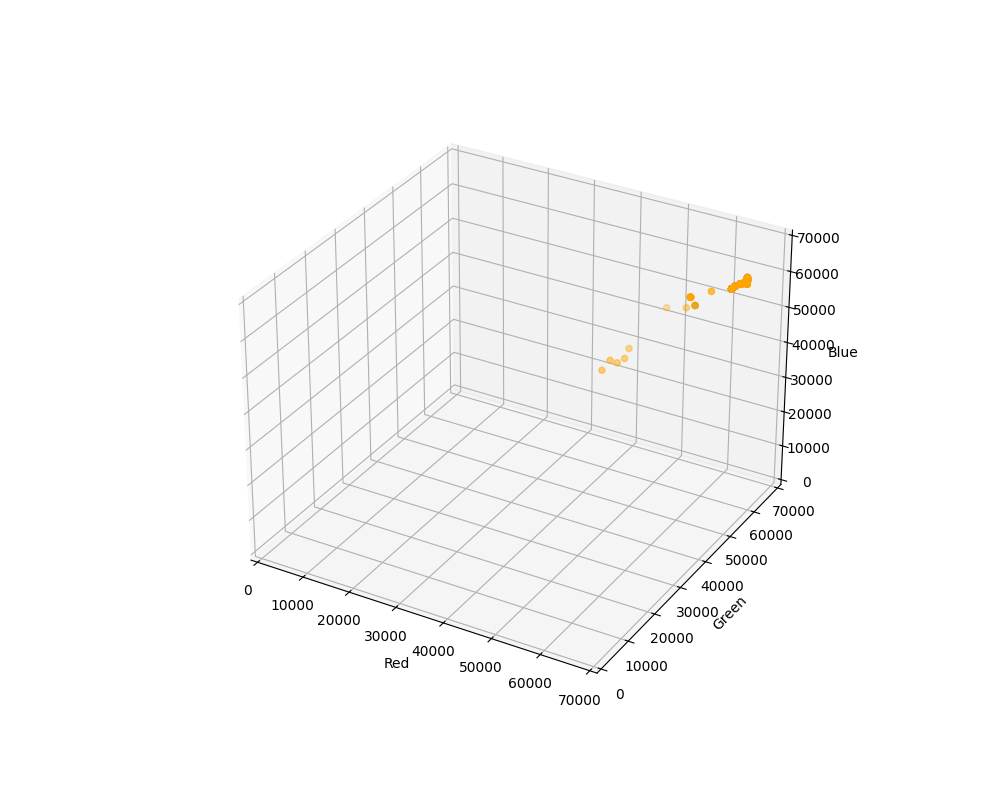

In [15]:
%matplotlib widget
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

fg1 = ax.scatter3D(dfWhite_train['Red'], dfWhite_train['Green'], dfWhite_train['Blue'], color='orange')

fg2 = ax.scatter3D(dfWhite_test['Red'], dfWhite_test['Green'], dfWhite_test['Blue'], color='black')

#fg3 = ax.scatter3D(dfBlack['Red'], dfBlack['Green'], dfBlack['Blue'], color='black')

$y = \beta_0 + \sum_{i = 1}^m \beta_i x_i$

* $\beta_0$ and $\beta_i$ - fitted parameters
* $y$ - dependent variable
* $x_i$ - independent variables
* `reg.intercept_` - $\beta_0$ 
* `reg.coef_` - $\beta_i$ for $1 \leq i \leq m$.

In [16]:
#Linear regression for the Red
X_reg_train = dfWhite_train[['Green','Blue']].copy()
y_reg_train = dfWhite_train[['Red']].copy()

X_reg_train = dfWhite_test[['Green','Blue']].copy()
y_reg_train = dfWhite_test[['Red']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(1838.0769519379464, 0.0, 1.0827773615644154)

In [17]:
#Linear regression for the Green
X_reg_train = dfWhite_train[['Red','Blue']].copy()
y_reg_train = dfWhite_train[['Green']].copy()

X_reg_train = dfWhite_test[['Red','Blue']].copy()
y_reg_train = dfWhite_test[['Green']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(65535.0, 0.0, 0.0)

In [18]:
#Linear regression for the Blue
X_reg_train = dfWhite_train[['Red','Green']].copy()
y_reg_train = dfWhite_train[['Blue']].copy()

X_reg_train = dfWhite_test[['Red','Green']].copy()
y_reg_train = dfWhite_test[['Blue']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(1097.9989742623293, 0.8792146858302761, 0.0)

In [19]:
dfWhite['Blue_predicted'] = reg.predict(dfWhite[['Red','Green']].values) 
dfWhite[['Blue','Blue_predicted']]

,Blue,Blue_predicted
0,56653,56480.611249
1,57742,57934.832340
2,55545,55965.391444
3,55556,55972.425161
4,55551,55969.787517
...,...,...
86,53411,52313.133639
87,46953,47813.312876
88,59879,58717.333410
89,59863,58717.333410
